In [1]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

# Learning curves for WMAZE participants
### Visually demonstrates learning across all three trial types

/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


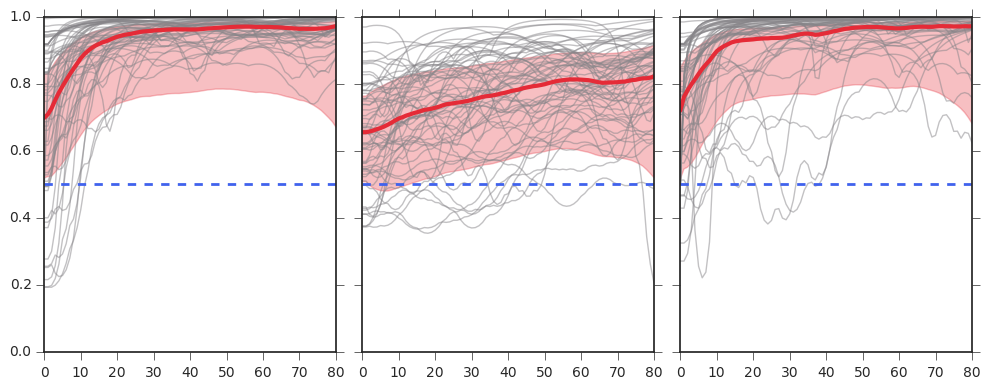

In [2]:
import seaborn as sns
sns.set_style("ticks")


subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
images = ['A', 'B', 'C']
sets = ['set1', 'set2', 'set3']
stim_dict = {'curve_A':[], 'up_95_A':[], 'low_05_A':[],
             'curve_B':[], 'up_95_B':[], 'low_05_B':[],
             'curve_C':[], 'up_95_C':[], 'low_05_C':[]}

for sub in subs:
    for curr_set in sets:     
        for image in images:
            sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
            upper_95 = np.loadtxt(join(sub_dir, '{0}_p95_{1}.txt'.format(image, curr_set)))
            stim_dict['up_95_{0}'.format(image)].append(upper_95)
            lower_05 = np.loadtxt(join(sub_dir, '{0}_p05_{1}.txt'.format(image, curr_set)))
            stim_dict['low_05_{0}'.format(image)].append(lower_05)
            learning = np.loadtxt(join(sub_dir, '{0}_pmode_{1}.txt'.format(image, curr_set)))
            stim_dict['curve_{0}'.format(image)].append(learning)

            
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (10, 4), sharex = True, sharey = True)
x = range(len(stim_dict['curve_A'][0]))

for i, A_curve in enumerate(stim_dict['curve_A']):
    ax0.plot(x, stim_dict['curve_A'][i], color = '#878589', linewidth = 1, alpha = 0.5)
ax0.plot(x, np.mean(stim_dict['curve_A'], axis = 0), "#e52b37", linewidth = 3)
ax0.axhline(0.5, color = '#4062ed', linewidth = 2, linestyle = "--")
ax0.fill_between(x, np.mean(stim_dict['curve_A'], axis = 0), 
                 np.mean(stim_dict['up_95_A'], axis = 0), color = "#e52b37", alpha = 0.3)
ax0.fill_between(x, np.mean(stim_dict['curve_A'], axis = 0), 
                 np.mean(stim_dict['low_05_A'], axis = 0), color = "#e52b37", alpha = 0.3)
#ax0.set_xlabel('Trials')
#ax0.set_ylabel('Probability of Correct Response')
#ax0.set_title('Fixed A')


for i, B_curve in enumerate(stim_dict['curve_B']):
    ax1.plot(x, stim_dict['curve_B'][i], color = '#878589', linewidth = 1, alpha = 0.5)
ax1.plot(x, np.mean(stim_dict['curve_B'], axis = 0), "#e52b37", linewidth = 3)
ax1.axhline(0.5, color = '#4062ed', linewidth = 2, linestyle = "--")
ax1.fill_between(x, np.mean(stim_dict['curve_B'], axis = 0), 
                 np.mean(stim_dict['up_95_B'], axis = 0), color = "#e52b37", alpha = 0.3)
ax1.fill_between(x, np.mean(stim_dict['curve_B'], axis = 0), 
                 np.mean(stim_dict['low_05_B'], axis = 0), color = "#e52b37", alpha = 0.3)
#ax1.set_xlabel('Trials')
#ax1.set_title('Conditional B')


for i, C_curve in enumerate(stim_dict['curve_C']):
    ax2.plot(x, stim_dict['curve_C'][i], color = '#878589', linewidth = 1, alpha = 0.5)
ax2.plot(x, np.mean(stim_dict['curve_C'], axis = 0), "#e52b37", linewidth = 3)
ax2.axhline(0.5, color = '#4062ed', linewidth = 2, linestyle = "--")
ax2.fill_between(x, np.mean(stim_dict['curve_C'], axis = 0), 
                 np.mean(stim_dict['up_95_C'], axis = 0), color = "#e52b37", alpha = 0.3)
ax2.fill_between(x, np.mean(stim_dict['curve_C'], axis = 0), 
                 np.mean(stim_dict['low_05_C'], axis = 0), color = "#e52b37", alpha = 0.3)
#ax2.set_xlabel('Trials')
#ax2.set_title('Fixed C')

ax0.set_ylim(0, 1)
fig.tight_layout()
plt.savefig("/home/arenf001/WMAZE_behavior.jpg", dpi = 1080)
fig.show()
